### Create timeseries from given power spectral density when the initial timeseries is known

Similar procedure as described in job001a...

In [11]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Create signal in time domain

In [12]:
T = 0.5 # s
N = 10000 # 
f = 10 # Hz

In [13]:
t = np.linspace(0, T, N)
Dt = t[1]-t[0] # Delta t

In [49]:
white_noise = True

if white_noise:
    mu, stdPhaseNoise = 0, 1e-8
    signal = np.random.normal(mu, stdPhaseNoise, N)
else:
    signal = np.sin(2*np.pi*f*t)

Text(0, 0.5, 'Amplitude (a.u.)')

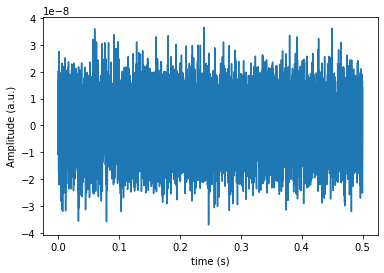

In [50]:
plt.plot(t, signal)
plt.xlabel('time (s)')
plt.ylabel('Amplitude (a.u.)')

### 2. FFT --> Frequency domain

In [51]:
fft = np.fft.fft(signal)
freq = np.fft.fftfreq(N, Dt)
Df = freq[1]-freq[0]

Text(0, 0.5, 'Amplitude (a.u.)')

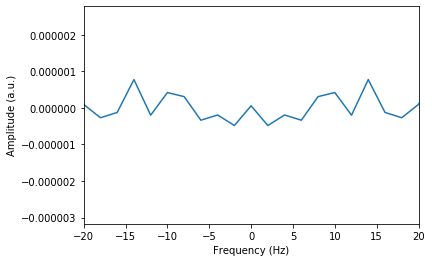

In [52]:
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(fft))
plt.xlim(-20, 20)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (a.u.)')

### 3. Compute the amplitude of the FFT, $r$, and the phase, $theta$

In [53]:
r = np.sqrt(np.real(fft)**2+np.imag(fft)**2) # = np.abs(fft)
theta = np.arctan2(np.imag(fft), np.real(fft))

### 4. Compute the PSD of the noise

In [54]:
Sxx = r**2/(Df*N**2) # power spectral density

Text(0, 0.5, 'Sxx (V^2/Hz)')

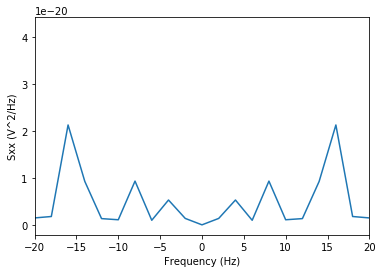

In [55]:
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(Sxx))
plt.xlim(-20, 20)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Sxx (V^2/Hz)')

#### 5. Go back to time series

1) Convert the noise power to FFT amplitue, $A(f(k))= \sqrt{(PSD(f(k))}$

In [56]:
A = np.sqrt(Sxx*(N**2)*Df)

### 4. Reconstruct the FFT by the amplitude and the phase information

In [57]:
fft_2 = A*np.exp(1j*theta)

### 5. Recover the original signal by applying inverse fourier transform

In [58]:
signal_reconstructed = np.fft.ifft(fft_2)

### 6. Compare the orginal signal with the recovered one

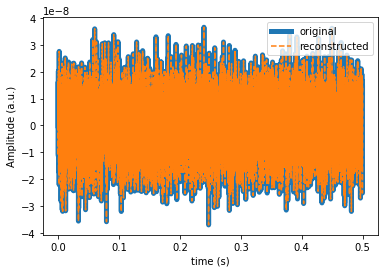

In [59]:
plt.plot(t, signal, linewidth = 5, label = 'original')
plt.plot(t, signal_reconstructed, linestyle='--', label='reconstructed')
plt.xlabel('time (s)')
plt.ylabel('Amplitude (a.u.)')
plt.legend(loc=1)